In [1]:
#3장
#3.1.1 K-최근접 이웃

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import metrics

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv('./data/iris.data', names = names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)


In [6]:

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [8]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도 : {}".format(accuracy_score(y_test, y_pred)))

정확도 : 0.9333333333333333


In [9]:
k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1): # k는 1에서 10까지 값을 취함
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc
    
max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도", max_acc, " 으로 최적의 k는", k+1, "입니다.")

정확도 0.9666666666666667  으로 최적의 k는 9 입니다.


In [10]:
#3.1.2 서포트 벡터 머신(SVM)

In [11]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)

In [12]:
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도:{0:f}'.format(score))

정확도:0.988889


In [13]:
#3.1.3 결정 트리

In [14]:
import pandas as pd
df = pd.read_csv('./data/train.csv', index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [15]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df = df.dropna()
X = df.drop('Survived', axis=1)
y = df['Survived']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8212290502793296

In [21]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns = ['Predicted No Survival', 'Predicted Survival'],
    index = ['True Not Survival', 'True Survival']
)

,Predicted No Survival,Predicted Survival
True Not Survival,98,14
True Survival,18,49


In [22]:
#3.1.4 로지스틱 회귀와 선형 회귀 

In [25]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


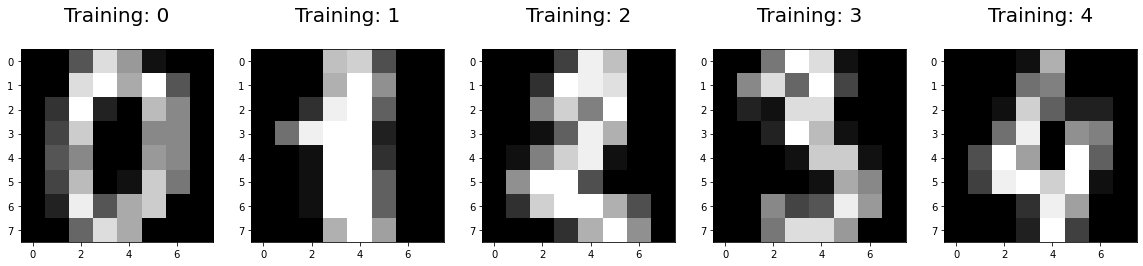

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)
               
               

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\kimso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [34]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


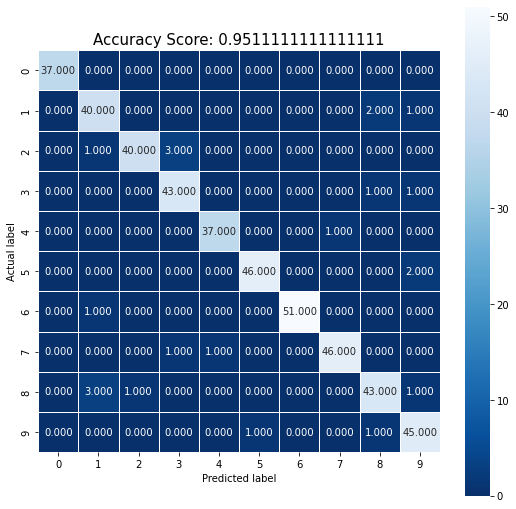

In [36]:
import numpy as np
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f',linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);
plt.show();

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('./data/weather.csv')

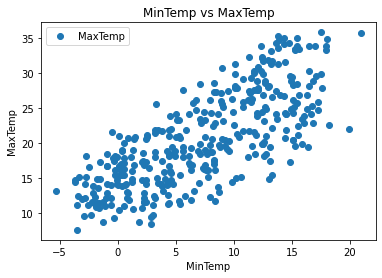

In [4]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [5]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

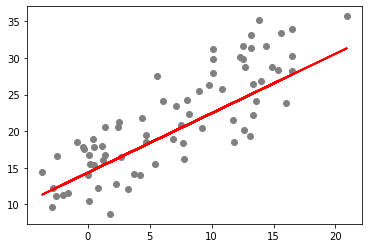

In [7]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [8]:
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 17.523053694931175
루트 평균제곱법: 4.186054669367229
